<img src="https://www.carscoops.com/wp-content/uploads/webp/2021/06/Toyota-Warranty-1.webp" >

### Dataset
The data set has the following columns:
* model: Character, the model of the car, (18 possible values)
* year: Numeric, year of manufacture from (1998 to 2020)
* price: Numeric, listed value of the car in GBP 
* transmission: Character, one of ("Manual", "Automatic", "Semi-Auto" or "Other")
* mileage: Numeric, listed milage of the car at time of sale
* fuelType: Character, one of ("Petrol", "Hybrid", "Diesel" or "Other")
* tax: Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price depending on the age of the car.
* mpg: Numeric, miles per gallon as reported by manufacturer
* engineSize: Numeric, listed engine size, one of (16 possible values)

**Target value** predict prices of used cars

### Required Tools
| Library | Description |
| ----------- | ----------- |
| [numpy](https://numpy.org) | adding support for large, multi-dimensional arrays and matrices |
| [pandas](https://pandas.pydata.org) | for data manipulation and analysis. |
| [sciket-learn](https://scikit-learn.org) | it features various classification, regression and clustering algorithms including support vector machines|
| [matplotlib](https://matplotlib.org) & [seaborn](https://seaborn.pydata.org)| is a plotting library |


In [444]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [445]:
# load data
df = pd.read_csv("dataset/toyota.csv")

# display first 5 observations
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


# Data Describtion
Below is a summary of our data contained in a Pandas DataFrame. Think of a DataFrame as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 6738 observations, or Toyota Cars, to analyze here

In [446]:
df.shape

(6738, 9)

In [447]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [448]:
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict['Missing Values'] = df.isnull().sum()
Data_dict['Unique Values'] = df.nunique()


Data_dict

,DataType,Missing Values,Unique Values
model,object,0,18
year,int64,0,23
price,int64,0,2114
transmission,object,0,4
mileage,int64,0,5699
fuelType,object,0,4
tax,int64,0,29
mpg,float64,0,81
engineSize,float64,0,16


In [449]:
df.describe(include='number')

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [450]:
df.describe(include='object')

,model,transmission,fuelType
count,6738,6738,6738
unique,18,4,4
top,Yaris,Manual,Petrol
freq,2122,3826,4087


# Data Cleaning
Below is a simple proccess to Clean Features (i.e. The features model and feulType are Categorical Data, Data has some duplicates need to be removed etc.)


#### remove duplicates

In [451]:
df.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


#### outliers

In [452]:
#it will return the range of the variables and the values outside this range will be outliers
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

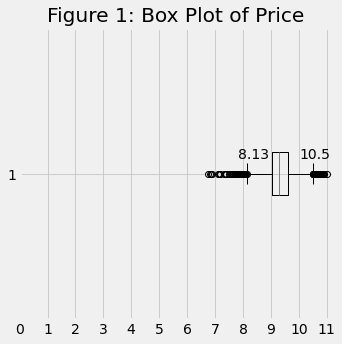

In [453]:
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
df['logprice'] = np.log(df['price'])
x=df['logprice']
price_range=list(range(0,int(max(df['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(df)[0]-0.3,1.05,str(round(min_max_price(df)[0],2)))
plt.text(min_max_price(df)[1]-0.5,1.05,str(round(min_max_price(df)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('images/preproccessing/graph-boxplot-price.jpg')
plt.show()

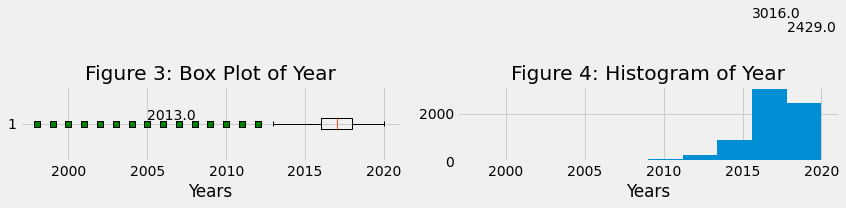

In [454]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12, 8))

#ploting boxplot
o1,o2=outliers(df,'year')
ax1.boxplot(sorted(df['year']), vert=False, flierprops=red_square)
ax1.set_xlabel("Years")
ax1.set_title("Figure 3: Box Plot of Year")
ax1.text(o1-8,1.05,str(round(o1,2)))

#ploting histogram
hist,bins=np.histogram(df['year'])
n, bins, patches = ax2.hist(x=df['year'], bins=bins)
ax2.set_xlabel("Years")
ax2.set_title("Figure 4: Histogram of Year")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('images/preproccessing/graph-barplot-histogram-year.jpg',dpi=1200)
plt.show()

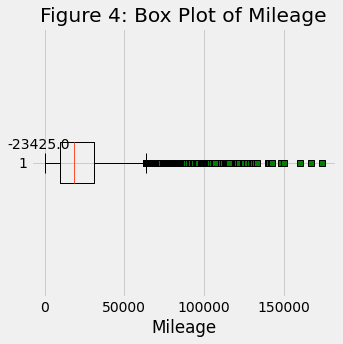

In [455]:
#ploting boxplot
o1,o2=outliers(df,'mileage')
plt.boxplot(sorted(df['mileage']), vert=False, flierprops=red_square)
plt.xlabel("Mileage")
plt.title("Figure 4: Box Plot of Mileage")
plt.text(o1-8,1.05,str(round(o1,2)))

plt.tight_layout()
plt.savefig('images/preproccessing/graph-boxplot-mileage.jpg',dpi=1200)
plt.show()

C:\Users\AHMEDH~1\AppData\Local\Temp/ipykernel_20312/3792430778.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


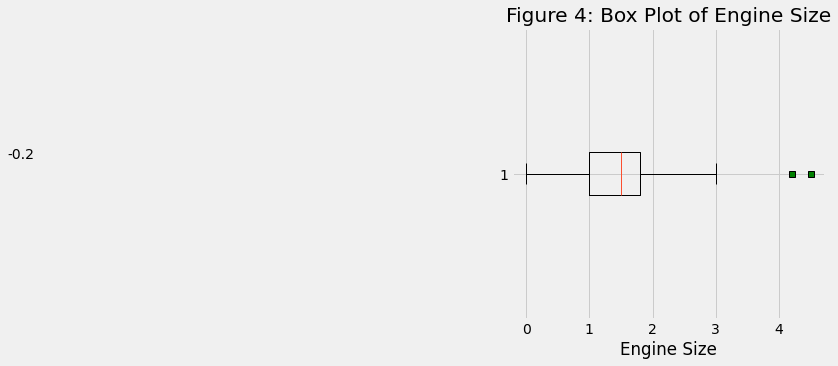

In [456]:
#ploting boxplot
o1,o2=outliers(df,'engineSize')
plt.boxplot(sorted(df['engineSize']), vert=False, flierprops=red_square)
plt.xlabel("Engine Size")
plt.title("Figure 4: Box Plot of Engine Size")
plt.text(o1-8,1.05,str(round(o1,2)))

plt.tight_layout()
plt.savefig('images/preproccessing/graph-boxplot-engineSize.jpg',dpi=1200)
plt.show()

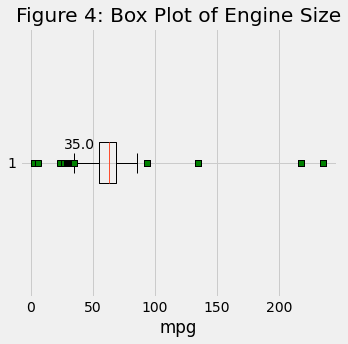

In [457]:
#ploting boxplot
o1,o2=outliers(df,'mpg')
plt.boxplot(sorted(df['mpg']), vert=False, flierprops=red_square)
plt.xlabel("mpg")
plt.title("Figure 4: Box Plot of Engine Size")
plt.text(o1-8,1.05,str(round(o1,2)))

plt.tight_layout()
plt.savefig('images/preproccessing/graph-boxplot-mpg.jpg',dpi=1200)
plt.show()

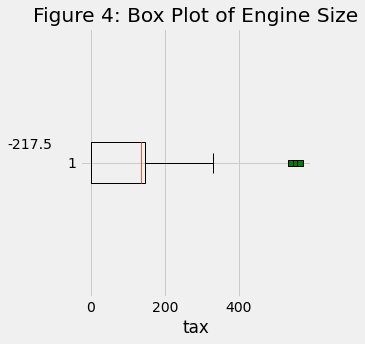

In [458]:
#ploting boxplot
o1,o2=outliers(df,'tax')
plt.boxplot(sorted(df['tax']), vert=False, flierprops=red_square)
plt.xlabel("tax")
plt.title("Figure 4: Box Plot of Engine Size")
plt.text(o1-8,1.05,str(round(o1,2)))

plt.tight_layout()
plt.savefig('images/preproccessing/graph-boxplot-tax.jpg',dpi=1200)
plt.show()

In [459]:
df_new = df.copy()
out = np.array(['logprice','year', 'mpg', 'tax', 'engineSize', 'mileage'])
for col in out:
    o1,o2=outliers(df_new, col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new=df_new[df_new['price']!=0]
df_new.drop('logprice',axis=1,inplace=True)


IQR of logprice = 8.13380498354869 10.504472355763763
IQR of year = 2013.0 2021.0
IQR of mpg = 35.35000000000001 91.74999999999999
IQR of tax = -217.5 362.5
IQR of engineSize = -0.20000000000000018 3.0
IQR of mileage = -21573.0 61067.0


In [460]:
df_new.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [461]:
print("Shape before process=",df.shape)
print("Shape After process=",df_new.shape)
diff=df.shape[0]-df_new.shape[0]
print("Total {} rows and {} cols removed".format(diff,df.shape[1]-df_new.shape[1]))
df_new.to_csv("vehiclesFinal.csv",index=False)


Shape before process= (6738, 10)
Shape After process= (6165, 9)
Total 573 rows and 1 cols removed


# Take a look Visually
The point of this project is to predict cars price based on the features in the data like:
* model
* year
* mpg
* ... etc.
  

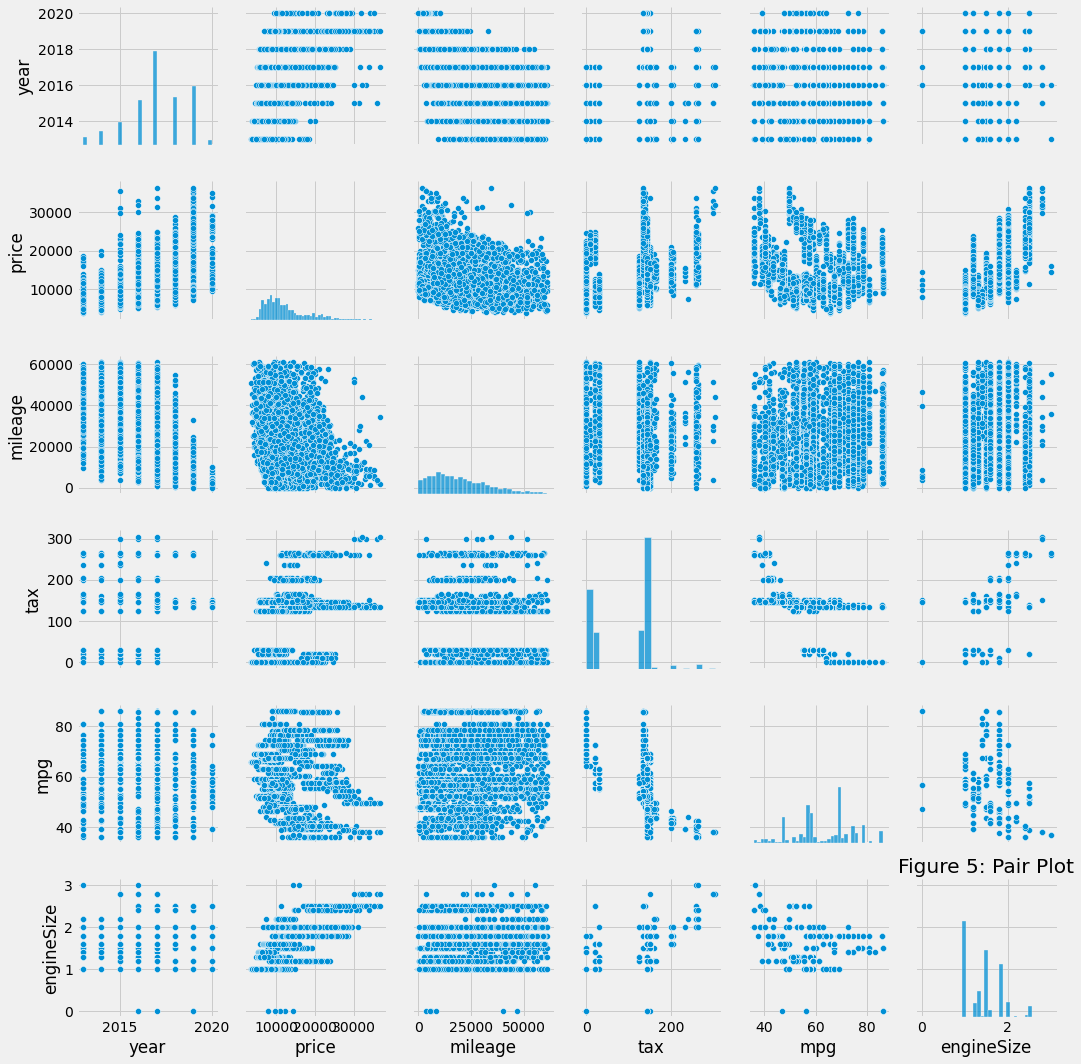

In [462]:
sns.pairplot(df_new)
plt.title('Figure 5: Pair Plot')
plt.tight_layout()
plt.savefig('images/insights/Insight-Pair-Plot',dpi=None)
plt.show()

C:\Users\AhmedHatemAbdelHamid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


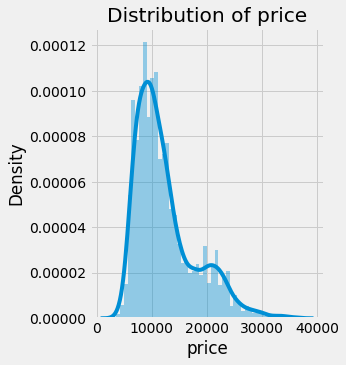

In [463]:
sns.distplot(df_new.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('images/insights/Insight-Dist-Plot',dpi=None)
plt.show()

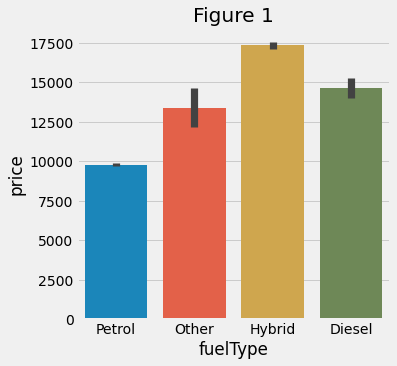

In [464]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuelType',y='price',data=df_new,ax=axs)
axs.set_title('Figure 1')

plt.savefig('images/insights/Insight-Figure-1',dpi=None)
plt.show()

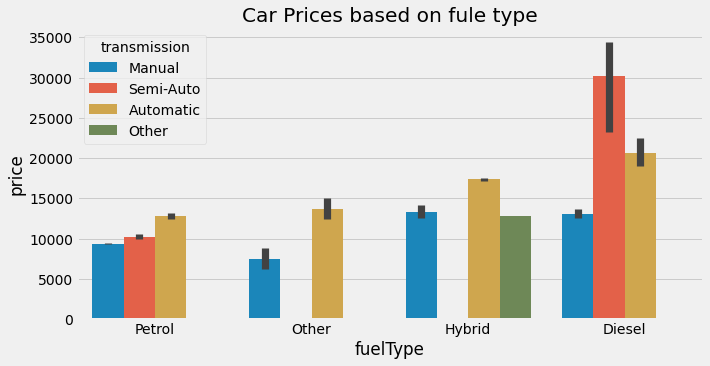

In [465]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuelType',y='price',hue='transmission',data=df_new)
plt.title('Car Prices based on fule type')
plt.savefig('images/insights/Insight-Figure-2',dpi=None)
plt.show()

C:\Users\AhmedHatemAbdelHamid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


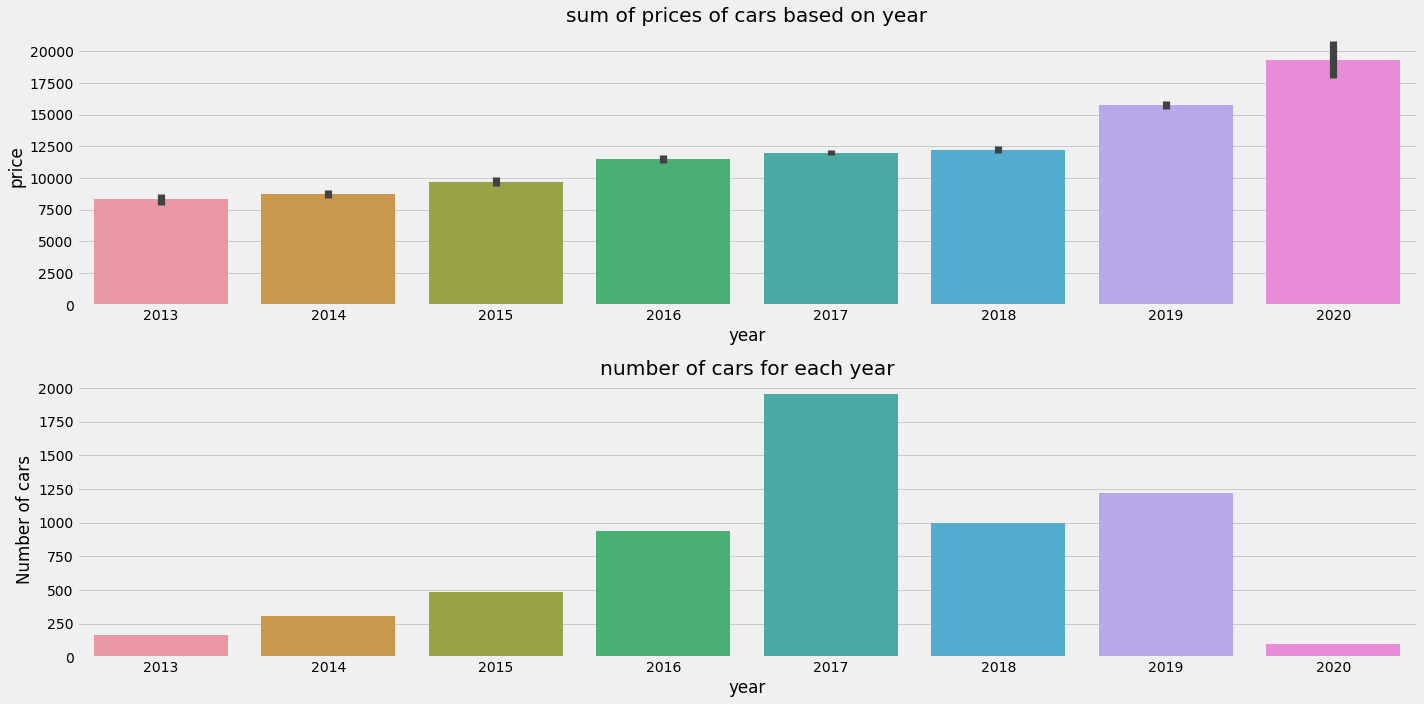

In [466]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='year',y='price',data=df_new,ax=axs[0])
sns.barplot(df_new.groupby('year').count()['price'].index,df_new.groupby('year').count()['price'].values,ax=axs[1])
axs[0].set_title('sum of prices of cars based on year')
axs[1].set_title('number of cars for each year')
axs[1].set_ylabel('Number of cars')
plt.tight_layout()
plt.savefig('images/insights/Insight-Figure-3-4.jpg',dpi=600)
plt.show()

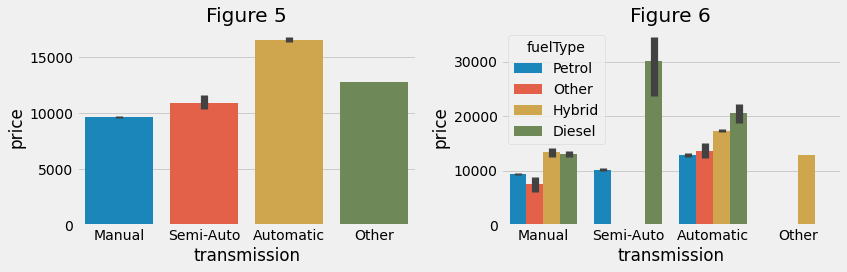

In [467]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='transmission',y='price',data=df_new,ax=axs[0])
sns.barplot(x='transmission',y='price',hue='fuelType',data=df_new,ax=axs[1])
axs[0].set_title('Figure 5')
axs[1].set_title('Figure 6')
plt.tight_layout()
plt.savefig('images/insights/Insight-Figure-5-6.jpg',dpi=600)
plt.show()

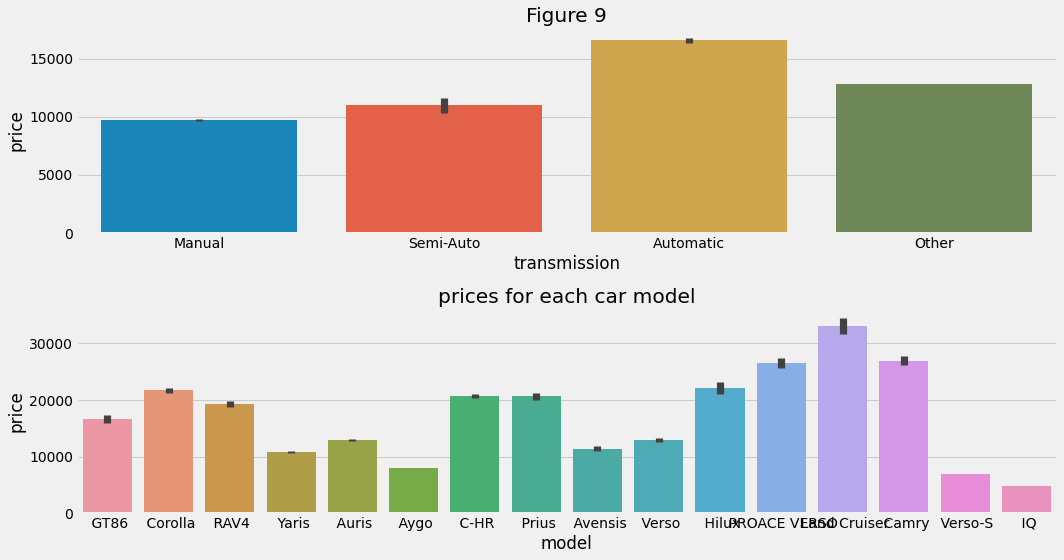

In [468]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='transmission',y='price',data=df_new,ax=axs[0])
sns.barplot(x='model',y='price',data=df_new,ax=axs[1])
axs[0].set_title('Figure 9')
axs[1].set_title('prices for each car model')
plt.tight_layout()
plt.savefig('images/insights/Insight-Figure-9-10.jpg',dpi=600)
plt.show()

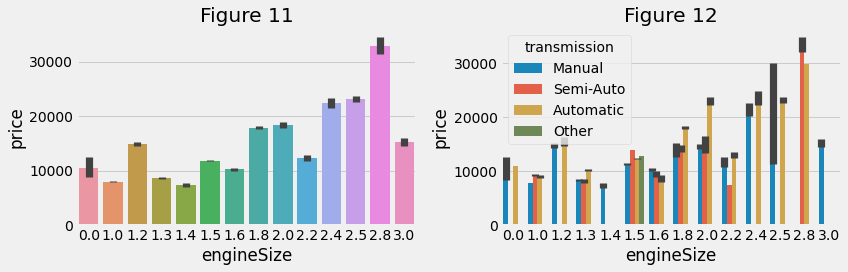

In [469]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='engineSize',y='price',data=df_new,ax=axs[0])
sns.barplot(x='engineSize',y='price',hue='transmission',data=df_new,ax=axs[1])
axs[0].set_title('Figure 11')
axs[1].set_title('Figure 12')
plt.tight_layout()
plt.savefig('images/insights/Insight-Figure-11-12.jpg',dpi=600)
plt.show()

C:\Users\AhmedHatemAbdelHamid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AhmedHatemAbdelHamid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


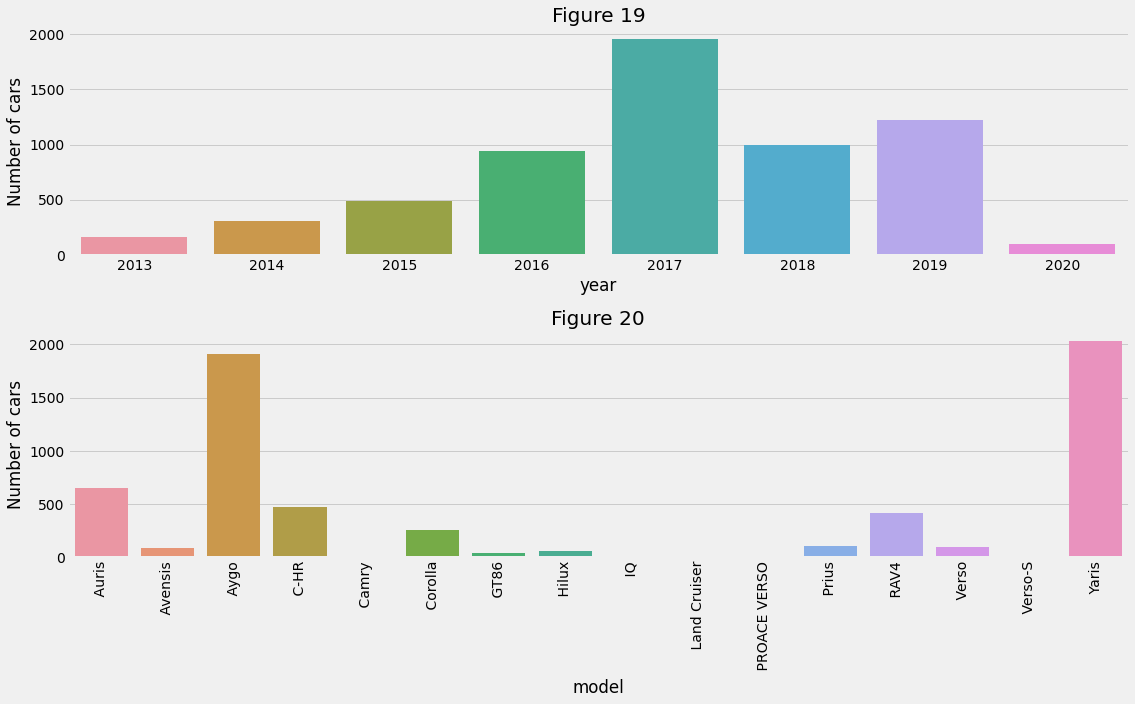

In [470]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(16,10)
sns.barplot(df_new.groupby('year').count()['price'].index,df_new.groupby('year').count()['price'].values,ax=axs[0])
sns.barplot(df_new.groupby('model').count()['price'].index,df_new.groupby('model').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 19')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 20')
axs[1].set_xticklabels(df_new.groupby('model').count()['price'].index,rotation=90)
plt.tight_layout()
plt.savefig('images/insights/Insight-Figure-19-20.jpg',dpi=600)
plt.show()

C:\Users\AhmedHatemAbdelHamid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AhmedHatemAbdelHamid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


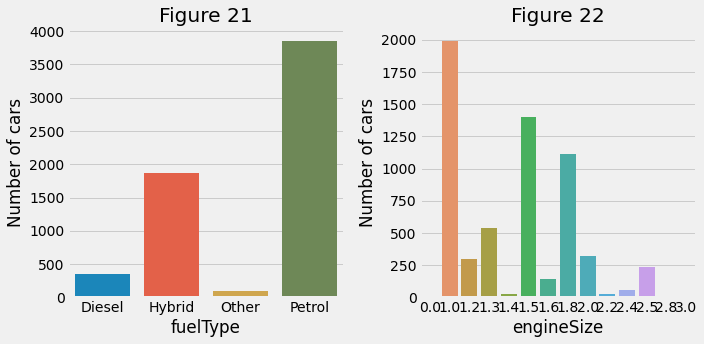

In [471]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(10,5)
sns.barplot(df_new.groupby('fuelType').count()['price'].index,df_new.groupby('fuelType').count()['price'].values,ax=axs[0])
sns.barplot(df_new.groupby('engineSize').count()['price'].index,df_new.groupby('engineSize').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 21')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 22')
plt.tight_layout()
plt.savefig('images/insights/Insight-Figure-21-22.jpg',dpi=600)
plt.show()

# Model Building
1. Lasso
2. Ridge
3. Linear Regression
4. KNN Regressor
5. XGBoost
6. Adaboost
7. Random Forest Regressor

In [472]:
#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

#### Data Transformation

In [473]:
num_cols = [col for col in df_new.columns if df_new[col].dtype != 'object']
cat_cols = [col for col in df_new.columns if df_new[col].dtype == 'object']

le=preprocessing.LabelEncoder()
df_new[cat_cols]=df_new[cat_cols].apply(le.fit_transform)


df_new.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,16000,1,24089,3,265,36.2,2.0
1,6,2017,15995,1,18615,3,145,36.2,2.0
2,6,2015,13998,1,27469,3,265,36.2,2.0
3,6,2017,18998,1,14736,3,150,36.2,2.0
4,6,2017,17498,1,36284,3,145,36.2,2.0


#### Data Scaling

In [474]:
#scaling numerical data

norm = StandardScaler()
df_new['price'] = np.log(df_new['price'])
df_new['year'] = norm.fit_transform(np.array(df_new['year']).reshape(-1,1))
df_new['model'] = norm.fit_transform(np.array(df_new['model']).reshape(-1,1))

#scaling target variable
q1,q3=(df_new['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df_new=df_new[(df_new.price>=o1) & (df_new.price<=o2)]

df_new['engineSize'] = norm.fit_transform(np.array(df_new['engineSize']).reshape(-1,1))
df_new['mileage'] = norm.fit_transform(np.array(df_new['mileage']).reshape(-1,1))
df_new['mpg'] = norm.fit_transform(np.array(df_new['mpg']).reshape(-1,1))
df_new['tax'] = norm.fit_transform(np.array(df_new['tax']).reshape(-1,1))


df_new.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.222102,-0.666973,9.680344,1,0.300641,3,2.435098,-2.348757,1.380942
1,-0.222102,-0.026592,9.680031,1,-0.098111,3,0.733087,-2.348757,1.380942
2,-0.222102,-1.307353,9.546670,1,0.546856,3,2.435098,-2.348757,1.380942
3,-0.222102,-0.026592,9.852089,1,-0.380675,3,0.804004,-2.348757,1.380942
4,-0.222102,-0.026592,9.769842,1,1.188982,3,0.733087,-2.348757,1.380942


#### Data Training

In [475]:
#function to split dataset int training and test
def trainingData(df,n):
    X = df.loc[:, ["model", "year", "transmission", "mileage", "fuelType", "tax", "mpg", "engineSize"]]
    y = df.loc[:,["price"]].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df_new,list(range(len(list(df.columns))-1)))

In [476]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

##### Linear Regression

In [477]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [478]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-0.03485276  0.12911766 -0.08361733 -0.07171632 -0.06781793 -0.00996399
 -0.03076877  0.25989114]
MSLE : 0.00024059115689642601
Root MSLE : 0.015511001157127996
R2 Score : 0.8306540882616521 or 83.0654%


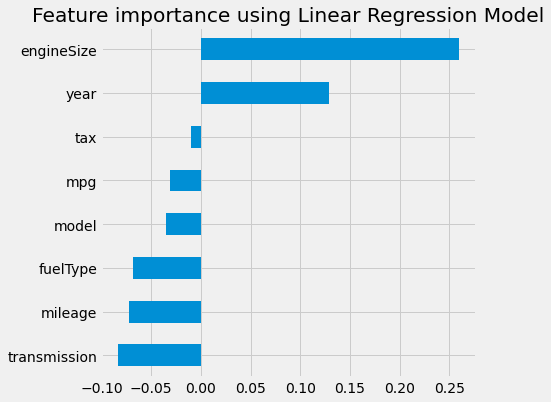

In [479]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('images/models/Linearb-Regression-Feature-Importance.jpg')
plt.show()

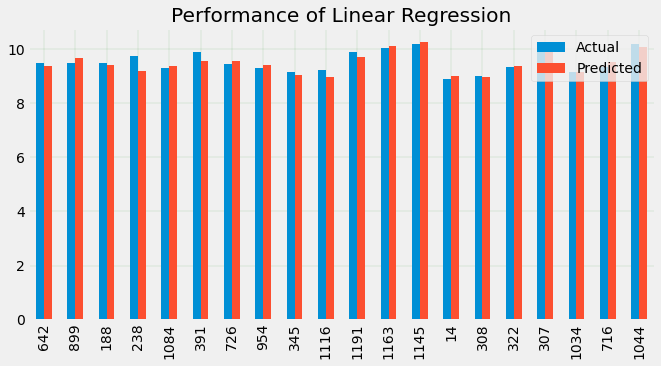

In [480]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('images/evaluation/Linear-Regression-Performance.jpg')
plt.show()

##### Adaboost

In [481]:
#model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

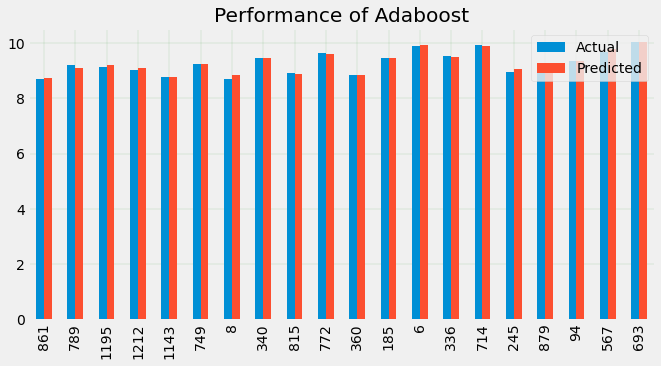

In [482]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Adaboost')
plt.savefig('images/evaluation/Adaboost-Performance.jpg')
plt.show()

In [483]:
#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))


MSLE : 7.363209128713611e-05
Root MSLE : 0.008580914361950952
R2 Score : 0.948552988944582 or 94.8553%


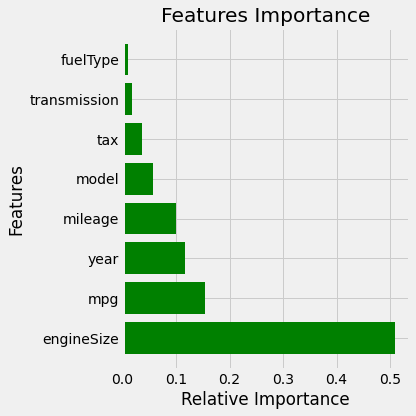

In [484]:
importances=ABR.feature_importances_
features=X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('images/models/Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

In [485]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('errors.csv')

##### XGBoost

In [486]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.6,
                max_depth = 3, alpha = 1, n_estimators = 100)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)


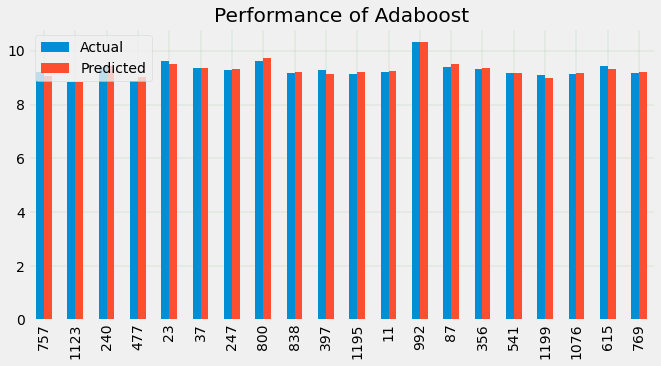

In [487]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Adaboost')
plt.savefig('images/evaluation/XGboost-Performance.jpg')
plt.show()

In [488]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 5.6406101287839276e-05
Root MSLE : 0.007510399542490351
R2 Score : 0.9608505810927604 or 96.0851%


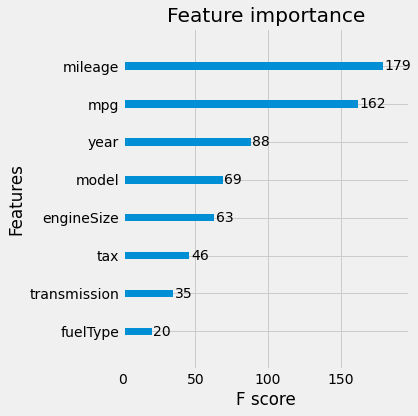

In [489]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('images/models/XGBoost-Features-Importance.jpg')
plt.show();

In [490]:
accu['XGBoost Regressor']=r8_xg

##### KNN Regressor

In [491]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.010452647846367532
K = 2  , Root MSLE = 0.009540761974113987
K = 3  , Root MSLE = 0.009214336880751147
K = 4  , Root MSLE = 0.009083892663121472
K = 5  , Root MSLE = 0.009150381451111857
K = 6  , Root MSLE = 0.008961000882802867
K = 7  , Root MSLE = 0.008971644704041786
K = 8  , Root MSLE = 0.008962073752386281
K = 9  , Root MSLE = 0.00897717507439565


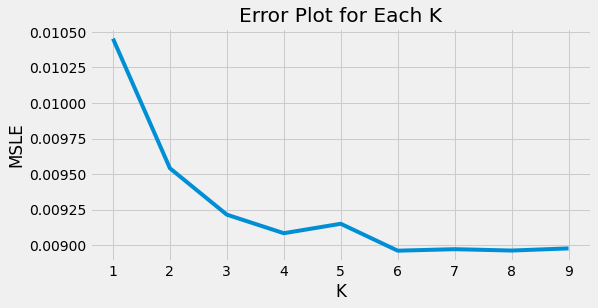

In [492]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('images/models/KNN-Error-Plot.jpg')
plt.show()

In [493]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=6) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [494]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 8.029953682159378e-05
Root MSLE : 0.008961000882802867
R2 Score : 0.9445025216846711 or 94.4503%


In [495]:
accu.to_csv('errors.csv')

##### Random Forest

In [496]:
RFR = RandomForestRegressor(n_estimators=100,random_state=0, min_samples_leaf=1, max_features=0.6, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [497]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 6.474795657849354e-05
Root MSLE : 0.008046611496679427
R2 Score : 0.9550654343640349 or 95.5065%


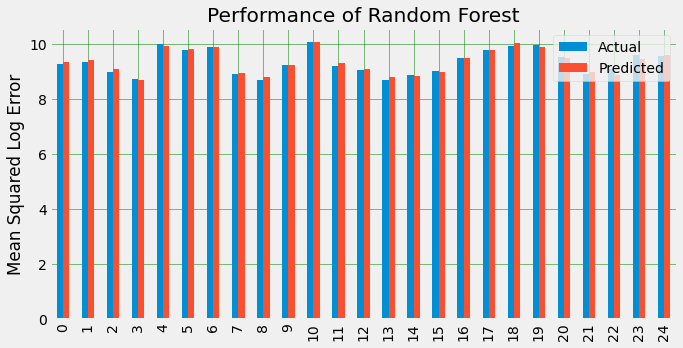

In [498]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('images/evaluation/Random-Forest-Performance.jpg')
plt.show()

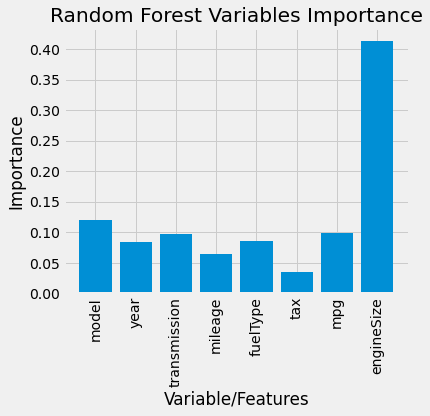

In [499]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('images/models/Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();


##### Lasso Regression

In [500]:
#model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [501]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.0002405885615045537
Root MSLE : 0.015510917493963846
R2 Score : 0.830649863271234 or 83.065%


##### Ridge Regression

In [502]:
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
model.fit(X_train,y_train)


RidgeCV(alphas=array([1.00000000e+10, 9.33092744e+09, 8.70662068e+09, 8.12408458e+09,
       7.58052437e+09, 7.07333228e+09, 6.60007502e+09, 6.15848211e+09,
       5.74643497e+09, 5.36195677e+09, 5.00320295e+09, 4.66845237e+09,
       4.35609903e+09, 4.06464440e+09, 3.79269019e+09, 3.53893170e+09,
       3.30215148e+09, 3.08121359e+09, 2.87505804e+09, 2.68269580e+09,
       2.50320398e+09, 2.33572147e+0...
       4.91732965e-02, 4.58832461e-02, 4.28133240e-02, 3.99488019e-02,
       3.72759372e-02, 3.47819065e-02, 3.24547446e-02, 3.02832867e-02,
       2.82571150e-02, 2.63665090e-02, 2.46023982e-02, 2.29563192e-02,
       2.14203749e-02, 1.99871964e-02, 1.86499079e-02, 1.74020937e-02,
       1.62377674e-02, 1.51513429e-02, 1.41376081e-02, 1.31916996e-02,
       1.23090791e-02, 1.14855124e-02, 1.07170483e-02, 1.00000000e-02]))

In [503]:
#model object and fitting model
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [504]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.00024061602236037072
Root MSLE : 0.015511802679262353
R2 Score : 0.8306282345323285 or 83.0628%


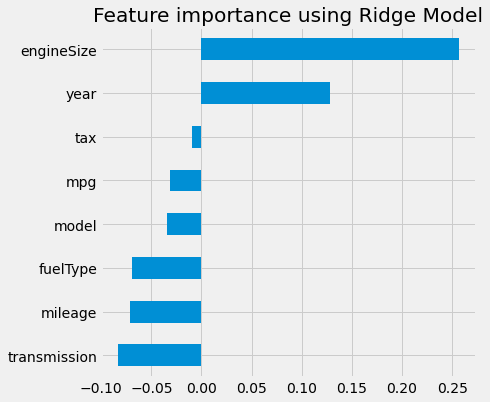

In [505]:
#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('images/models/Ridge-Regression-Feature-Importance.jpg')
plt.show()

# Evaluation

In [506]:
accu.to_csv('errors.csv')
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,AdaBoost Regressor,XGBoost Regressor,KNN,RandomForest Regressor,Lasso Regression,Ridge Regression
MSLE,0.000241,0.000074,0.000056,0.000080,0.000065,0.000241,0.000241
Root MSLE,0.015511,0.008581,0.007510,0.008961,0.008047,0.015511,0.015512
R2 Score,0.830654,0.948553,0.960851,0.944503,0.955065,0.830650,0.830628
Accuracy(%),83.065400,94.855300,96.085100,94.450300,95.506500,83.065000,83.062800


In [507]:
model_accuracy=accu.loc['Accuracy(%)']

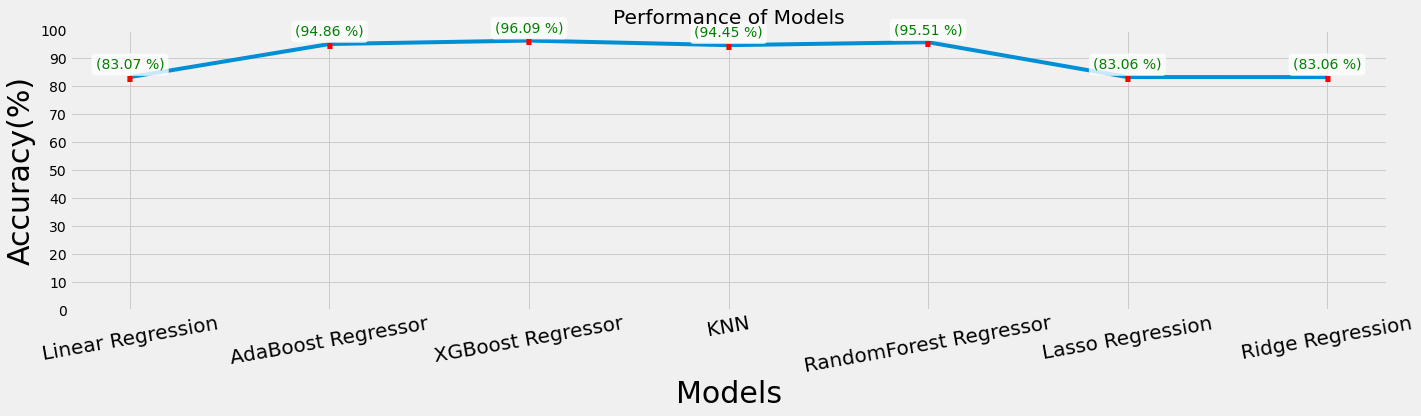

In [508]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();
